In [1]:
from scipy.stats import multivariate_normal
import numpy as np
import scipy.io
mat = scipy.io.loadmat('array_sample.mat')
rgb = mat['array_sample']
rgb = np.delete(rgb, 0, axis=1)
rgb = rgb.tolist()

class1 = [rgb[i] for i in range(len(rgb)) if rgb[i][3] == 1]
class2 = [rgb[i] for i in range(len(rgb)) if rgb[i][3] == -1]

# compute the prior probability
prior1 = len(class1) / (len(class1) + len(class2))
prior2 = len(class2) / (len(class1) + len(class2))

# compute the mean and covariance for 2 classes
class1 = np.asarray(class1)
class2 = np.asarray(class2)
mu1 = np.mean(np.delete(class1, 3, axis=1), axis=0)
mu2 = np.mean(np.delete(class2, 3, axis=1), axis=0)
Sigma1 = np.cov(np.delete(class1, 3, axis=1), rowvar=False)
Sigma2 = np.cov(np.delete(class2, 3, axis=1), rowvar=False)

In [43]:
[[prior1, prior2],
[mu1, mu2],
[Sigma1, Sigma2]]

[[0.683991683991684, 0.316008316008316],
 [array([0.65280857, 0.36111285, 0.1624486 ]),
  array([0.75050148, 0.71190983, 0.75877838])],
 [array([[0.02927777, 0.01255938, 0.00271681],
         [0.01255938, 0.00902525, 0.0065936 ],
         [0.00271681, 0.0065936 , 0.01111142]]),
  array([[0.01696326, 0.01833529, 0.02183609],
         [0.01833529, 0.02731822, 0.03871634],
         [0.02183609, 0.03871634, 0.06444389]])]]

In [26]:
import cv2
img = cv2.imread('309.bmp')
# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mat2 = scipy.io.loadmat('Mask.mat')
mask = mat2['Mask']
img = cv2.bitwise_and(img, img, mask=mask) / 255
# cv2.imshow('rgb image after being masked', img)
# cv2.waitKey(0)


In [5]:
img[:,:,2]

array([[ 60,  56,  54, ...,  29,  29,  29],
       [ 62,  59,  56, ...,  29,  29,  29],
       [ 63,  60,  58, ...,  26,  26,  26],
       ...,
       [173, 167, 163, ...,  48,  47,  47],
       [173, 167, 163, ...,  50,  49,  49],
       [173, 167, 163, ...,  51,  51,  51]], dtype=uint8)

In [6]:
mask[:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
img = cv2.bitwise_and(img, img, mask=mask)


In [ ]:
cv2.imshow('rgb image after being masked', img)
cv2.waitKey(0)

In [2]:
x = np.linspace(0, 5, 10, endpoint=False)

In [37]:
img[0][0].all() == 0

True

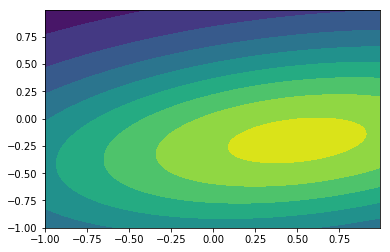

In [15]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
import matplotlib.pyplot as plt
%matplotlib inline
plt.contourf(x, y, rv.pdf(pos))


In [19]:
rv.pdf(pos[0,0,:])

0.06610268567287654

In [20]:
pos[0,0,:]

array([-1., -1.])